<a href="https://colab.research.google.com/github/lorenarms/CSV_Parser/blob/master/dog_classification/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier usering TensorFlow 20 and TensorFlow Hub.

## 1. Problem

Identifying the breed of dog given an image of a dog.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Some information about the data:
* Images (unstructured data)
* 120 breeds of dogs (120 different classes)
* There are 10,000+ images in the training set
* There are 10,000+ images in the test set (images with no labels)

## Getting the Workspace Ready

- [X] Import Tensorflow
- [X] Import Tensorflow Hub
- [X] Ensure the use of a GPU


In [2]:
# optional: import tf version 2.x
# in the event version 2.x is not automatically imported

# try:
#   %tensorflow_version 2.x
# except Exception
#   pass


In [3]:
# import necessary things
import tensorflow as tf
import tensorflow_hub as hub
print('TF version: ', tf.__version__)
print('TF Hub version: ', hub.__version__)

# check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version:  2.12.0
TF Hub version:  0.14.0
GPU available


## Getting the Data Ready

In [4]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Dog Vision Data/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [5]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


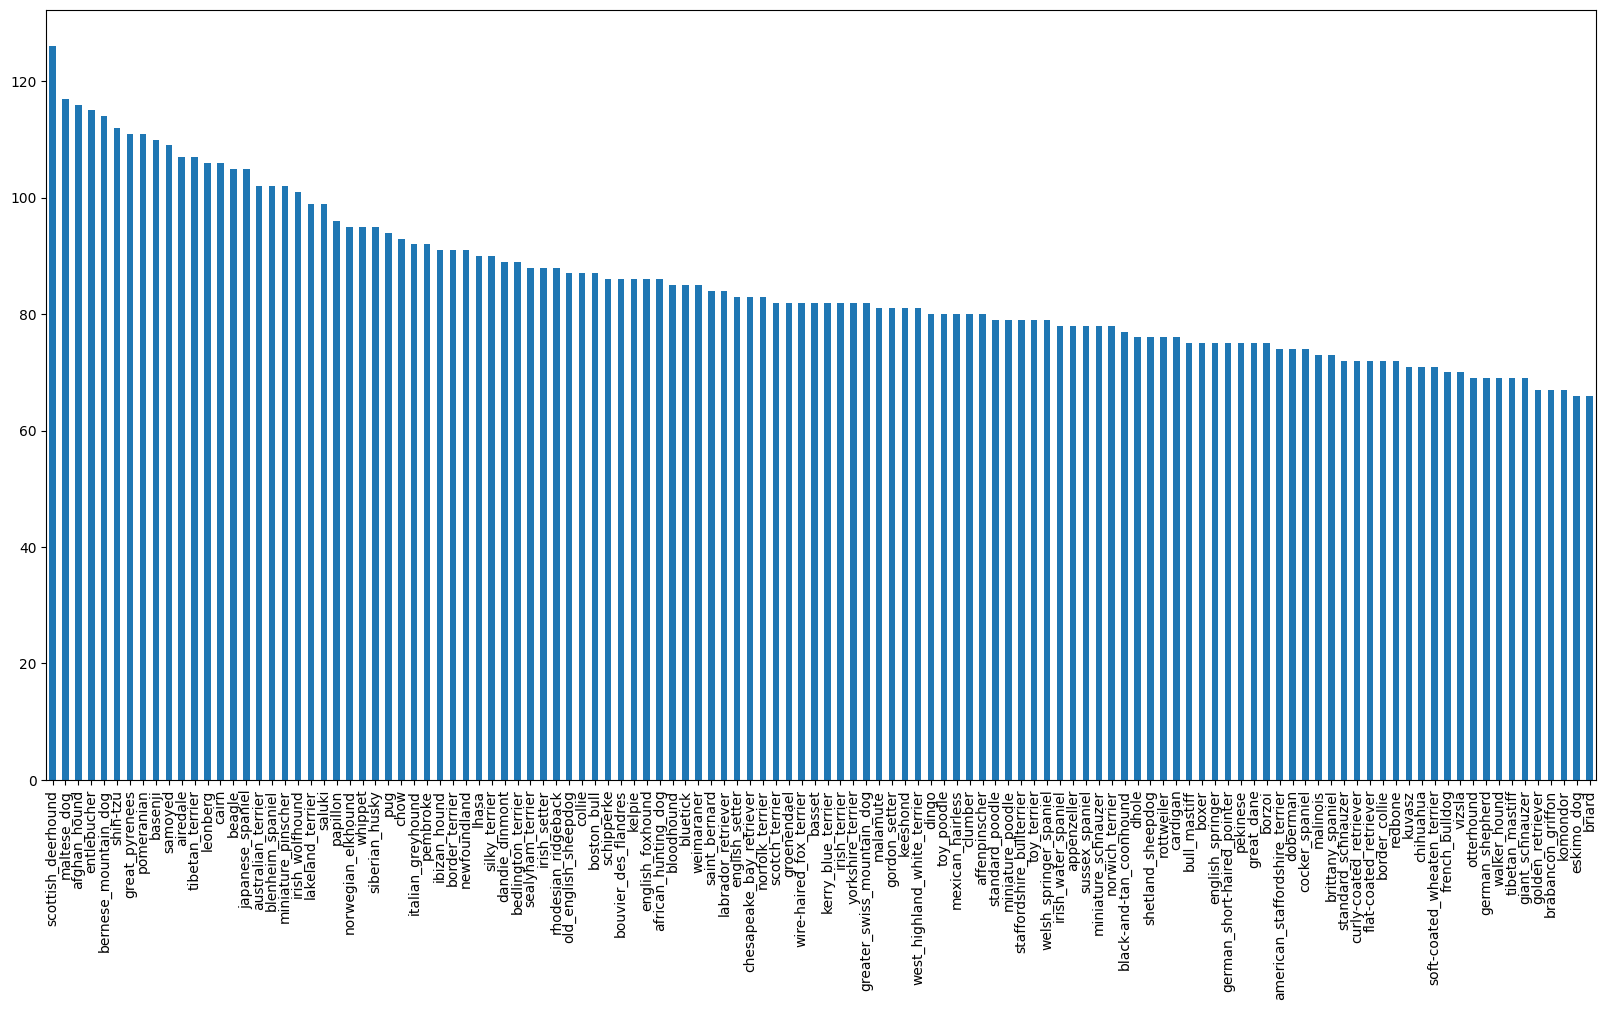

In [6]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [7]:
# Google recommends minimum 100 annotations (images) per label
# requires minimum of 10 per label
labels_csv["breed"].value_counts().median()

82.0

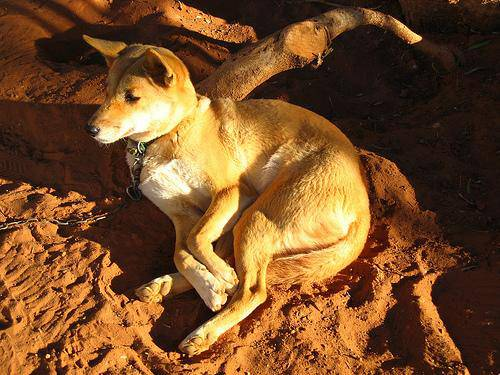

In [8]:
# viewing an image
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Data/Dog Vision Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting Images and their Labels

In [9]:
# Create path names from image ID's
filenames = ["/content/drive/MyDrive/Colab Notebooks/Data/Dog Vision Data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

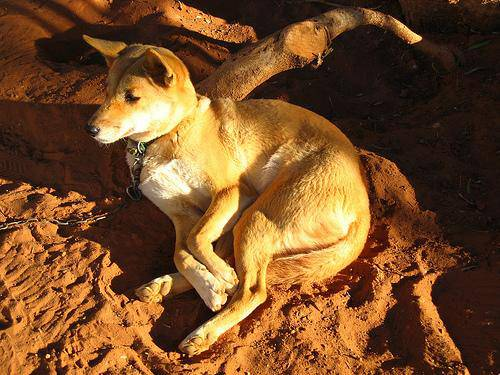

In [10]:
# now we can view the pictures easier
Image(filenames[1])

In [11]:
len(filenames), len(labels_csv)

(10222, 10222)

In [12]:
# check that file amounts match
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Data/Dog Vision Data/train/")) == len(filenames):
  print("Amount of files match")
else:
  print("Amount of files DO NOT match")

Amount of files match


## Turning Data Labels into Numbers

In [13]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
len(labels)

10222

In [14]:
# Find number of unique values in array
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [15]:
len(unique_breeds)

120

In [16]:
# turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
labels[0]

'boston_bull'

In [18]:
# turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:5]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(boolean_labels)

10222

In [20]:
# Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a '1' where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own Validation Set
The set from Kaggle doesn't come with validation so we'll create our own

In [21]:
# setup variables
from sklearn.model_selection import train_test_split

X = filenames
y = boolean_labels

NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step: 100}

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [22]:
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Colab Notebooks/Data/Dog Vision Data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Data/Dog Vision Data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False

## Turning Images into Tensors
Preprocessing Images


In [23]:
# preprocessing function for images
# 1. take image filepath as input
# 2. use Tensorflow to read filepath, save to variable 'image'
# 3. turn image (.jpg) into Tensors
# 4. normalize image
# 5. resize image to shape of 224, 224
# 6. return modified image



In [24]:
# sample function
from matplotlib.pyplot import imread
image = imread(filenames[42])

# turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [35]:
# define an image preproceessing function
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor
  """
  # read in image file
  image = tf.io.read_file(image_path)
  # turn jpg image into numerical Tensor with 3 color channels (r g b)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert color channel values from 0-255 values to 0-1 values (normalization)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

## Turning data into Batches

Allows for processing more efficiently, given the amount of memory you have access to

We'll create Tensor tuples for our batches


In [36]:
# function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, processes the image, and returns a type of (image, label)
  """
  image = process_image(image_path)
  return image, label


In [37]:
# demo of above function
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

# Create batches of `X` and `y`

In [48]:
# define batch size (32 is a good start)
BATCH_SIZE = 32

# function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it is training data, but does not shuffle if it's validation data.
  Also accepts test data as input (no labels)
  """
  # if data is test dataset, no labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # valid dataset, no shuffle
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepath
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # turn file paths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # shuffle
    data = data.shuffle(buffer_size=len(X))
    # create (image, label) tuples, preprocess
    data = data.map(get_image_label)

    # turn training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch



In [49]:
# create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [51]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [55]:
import matplotlib.pyplot as plt

# create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from a data batch.
  """
  # setup the fiture
  plt.figure(figsize=(10, 10))
  # loop through 25 (for displaying 25 images)
  for i in range(25):
    # create subplots
    ax = plt.subplot(5, 5, i + 1)
    # display and image
    plt.imshow(images[i])
    # add image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # turn grid lines off
    plt.axis("off")

In [59]:
# take the batch, unwind as numpy iterator
# 'next' will grab the first batch
# train_images will be the first var pulled from the batch, train_labels will be the second
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels) # batch size is 32

(32, 32)

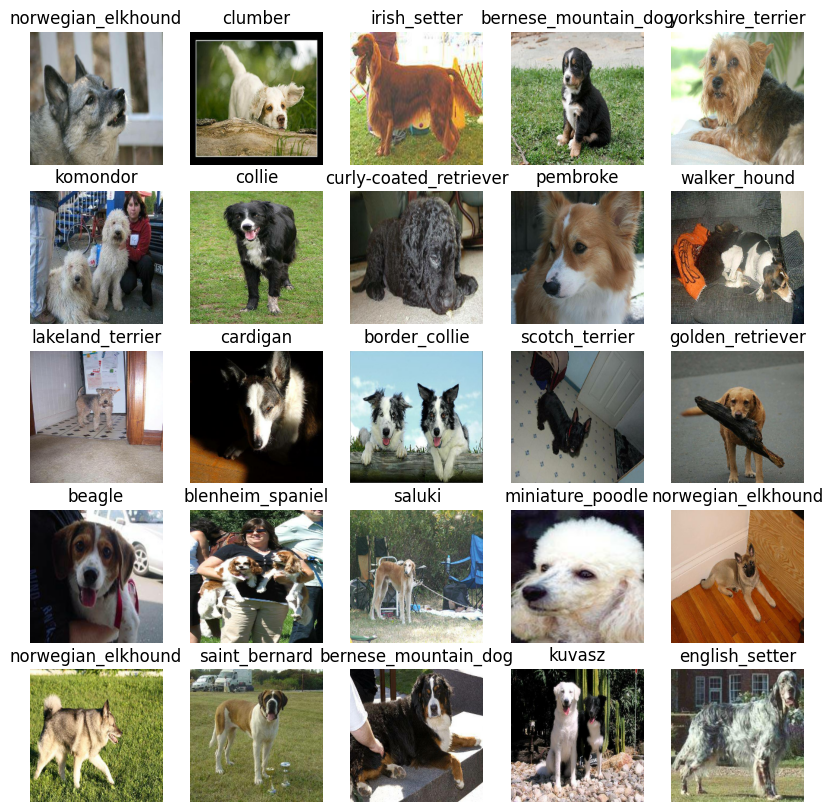

In [60]:
# visualizing the data
show_25_images(train_images, train_labels)